In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lu_decomposition(matrix, smart_pivot=False):
    n = len(matrix)
    lower = np.eye(n)
    upper = np.copy(matrix)
    permutation = np.eye(n)
    if matrix.shape[0] > matrix.shape[1]:
        raise ValueError("LU decomposition failed: size issue")
    for i in range(n):
        if(smart_pivot):
            pivot_idx = np.argmax(np.abs(upper[i:, i])) + i  # Find the index of the largest absolute value in the column
            if pivot_idx != i:
                upper[[i, pivot_idx]] = upper[[pivot_idx, i]]  # Swap rows in the upper matrix
                lower[[i, pivot_idx], :i] = lower[[pivot_idx, i], :i]  # Update lower matrix swapping rows
                permutation[[i, pivot_idx]] = permutation[[pivot_idx, i]]  # Update permutation matrix

        pivot = upper[i, i]
        if pivot == 0:
            raise ValueError("LU decomposition failed: zero pivot encountered")

        lower[i+1:, i] = upper[i+1:, i] / pivot
        upper[i+1:] -= lower[i+1:, i][:, np.newaxis] * upper[i]

    return lower, upper, permutation

def solve_lu_decomposition(L, U, P, b):
    n = len(b)
    y = np.zeros(len(L))
    x = np.zeros(len(U[0]))

    Pb = P @ b  # Apply permutation to b

    # Forward substitution: Ly = Pb
    for i in range(n):
        y[i] = Pb[i] - np.dot(L[i, :i], y[:i])

    # Backward substitution: Ux = y
    for i in range(n - 1, -1, -1):
        if i == n - 1:
            x[i] = y[i] / U[i, i]
        else:
            x[i] = (y[i] - np.dot(U[i, i+1:n], x[i+1:n])) / U[i, i]

    return x

In [6]:
A = np.array([[6, 18, 3], [2, 12, 1], [4, 15, 3]], dtype=np.float16)
b = np.array([3, 19, 0], dtype=np.float16)

L, U, P = lu_decomposition(A)

print('Lower triangular matrix (L) with pivoting:\n', L)
print('\nUpper triangular matrix (U) with pivoting:\n', U)
print('\nPermutation matrix (P):\n', P)
print('LUP:\n', L @ U)

x = solve_lu_decomposition(L, U, P, b)
print("\nSolution x for Ax=b:", x)
print("LUx:\n", A @ x)

Lower triangular matrix (L) with pivoting:
 [[1.         0.         0.        ]
 [0.33325195 1.         0.        ]
 [0.66650391 0.50048828 1.        ]]

Upper triangular matrix (U) with pivoting:
 [[6.000e+00 1.800e+01 3.000e+00]
 [4.883e-04 6.000e+00 2.441e-04]
 [7.324e-04 9.766e-04 1.000e+00]]

Permutation matrix (P):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
LUP:
 [[ 6.         18.          3.        ]
 [ 2.         11.99853516  1.        ]
 [ 4.00000024 15.00097656  2.99963391]]

Solution x for Ax=b: [ -2.99725439   3.00048862 -11.00842297]
LUx:
 [ 3.00000000e+00  1.90029317e+01 -6.95709883e-03]


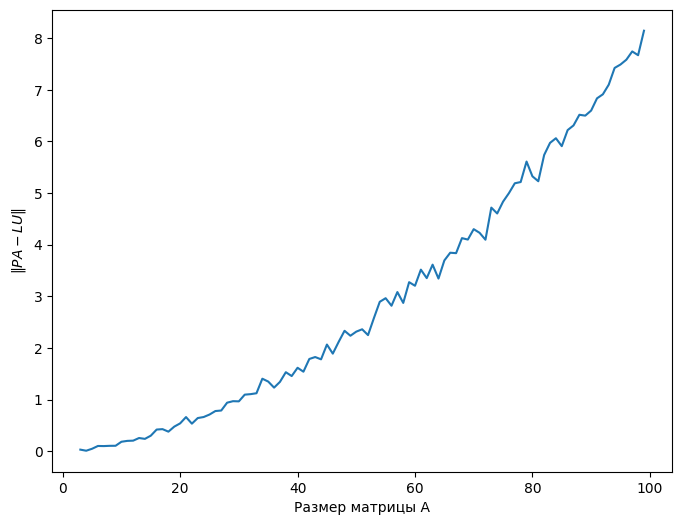

In [7]:
errors = []
for i in range(3, 100):
    A = np.array(np.random.rand(i, i) * 100, dtype=np.float16)
    L, U, P = lu_decomposition(A, True)
    errors.append([i, np.linalg.norm(P @ A - L @ U)])
errors = np.transpose(errors)

plt.figure(figsize=(8, 6))
plt.plot(errors[0], errors[1])
plt.xlabel('Размер матрицы A')
plt.ylabel(r'$\|PA - LU\|$')
plt.show()

In [24]:
from tqdm import tqdm

errors = []
for i in tqdm(range(10, 500)):
    A = np.array(np.random.rand(10, i) * 100, dtype=np.float16)
    b = np.array(np.random.rand(10) * 100, dtype=np.float16)
    L, U, P = lu_decomposition(A, True)
    x = solve_lu_decomposition(L, U, P, b)
    A_128 = np.array(A, dtype=np.float128)
    b_128 = np.array(b, dtype=np.float128)
    L_128, U_128, P_128 = lu_decomposition(A_128, True)
    x_128 = solve_lu_decomposition(L_128, U_128, P_128, b_128)
    errors.append([i, np.linalg.norm(x - x_128)])
errors = np.transpose(errors)

100%|██████████| 490/490 [00:02<00:00, 221.31it/s]


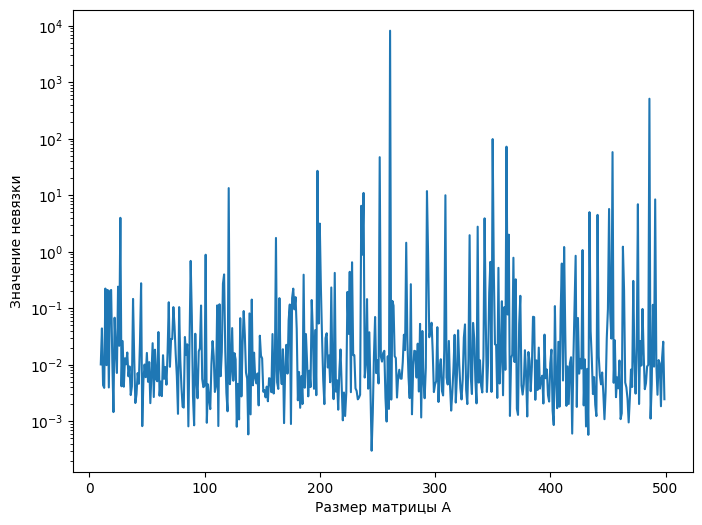

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(errors[0], errors[1])
plt.xlabel('Размер матрицы A')
plt.ylabel('Значение невязки')
plt.yscale('log')
plt.show()

In [19]:
errors = []
for i in tqdm(range(3, 500)):
    A = np.array(np.random.rand(i, 500) * 100, dtype=np.float16)
    b = np.array(np.random.rand(i) * 100, dtype=np.float16)
    L, U, P = lu_decomposition(A, True)
    x = solve_lu_decomposition(L, U, P, b)
    A_128 = np.array(A, dtype=np.float128)
    b_128 = np.array(b, dtype=np.float128)
    L_128, U_128, P_128 = lu_decomposition(A_128, True)
    x_128 = solve_lu_decomposition(L_128, U_128, P_128, b_128)
    errors.append([i, np.linalg.norm(x - x_128)])
errors = np.transpose(errors)

100%|██████████| 497/497 [05:11<00:00,  1.60it/s]


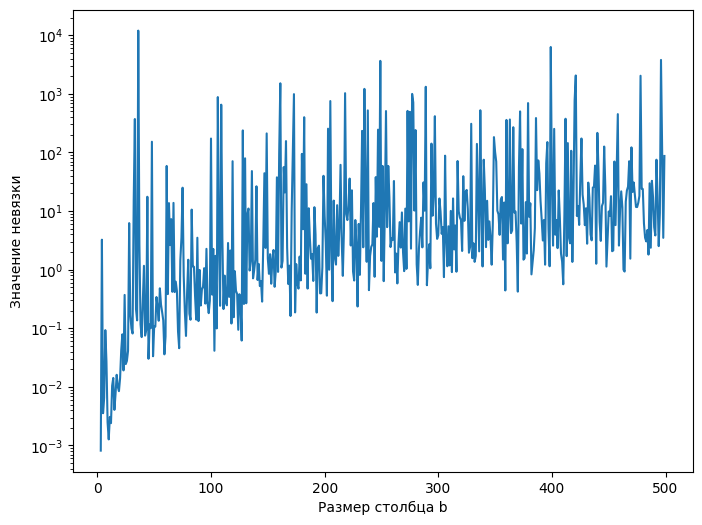

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(errors[0], errors[1])
plt.xlabel('Размер столбца b')
plt.ylabel('Значение невязки')
plt.yscale('log')
plt.show()

In [16]:
import numpy as np

A = np.array([[1e-4, 1], [1, 1]], dtype=np.float16)

L, U, P = lu_decomposition(A, True)

print('Lower triangular matrix (L) with pivoting:\n', L)
print('Upper triangular matrix (U) with pivoting:\n', U)
print('Permutation matrix (P):\n', P)
print('LUP:\n', L @ U)

L, U, P = lu_decomposition(A, False)

print('Lower triangular matrix (L) without pivoting:\n', L)
print('Upper triangular matrix (U) without pivoting:\n', U)
print('Permutation matrix (P):\n', P)
print('LUP:\n', L @ U)

Lower triangular matrix (L) with pivoting:
 [[1.00000000e+00 0.00000000e+00]
 [1.00016594e-04 1.00000000e+00]]
Upper triangular matrix (U) with pivoting:
 [[1. 1.]
 [0. 1.]]
Permutation matrix (P):
 [[0. 1.]
 [1. 0.]]
LUP:
 [[1.00000000e+00 1.00000000e+00]
 [1.00016594e-04 1.00010002e+00]]
Lower triangular matrix (L) without pivoting:
 [[1.e+00 0.e+00]
 [1.e+04 1.e+00]]
Upper triangular matrix (U) without pivoting:
 [[ 1.000e-04  1.000e+00]
 [-1.659e-04 -1.000e+04]]
Permutation matrix (P):
 [[1. 0.]
 [0. 1.]]
LUP:
 [[1.00016594e-04 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]]
